In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,minmax_scale
from sklearn import model_selection
from sklearn import metrics
from scipy.stats import zscore
import matplotlib.pyplot as plt 

In [9]:
colnames = ['preg', 'glu', 'bp', 'sft', 'ins', 'bmi', 'dpf', 'age', 'outcome']
prima_df = pd.read_csv("pima-indians-diabetes.data",names=colnames)
prima_df.head()

,preg,glu,bp,sft,ins,bmi,dpf,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
X=prima_df[['preg', 'glu', 'bp', 'sft', 'ins', 'bmi', 'dpf', 'age']]
Y=prima_df['outcome']

In [11]:
X=minmax_scale(X)


C:\Users\Mangesh Karande\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64.
  """Entry point for launching an IPython kernel.


In [12]:
Dt_model=DecisionTreeClassifier(criterion='entropy',random_state=0)#fully grown tree (high bias error and var error)

In [13]:
#Regularized Tree (comparatively var error is reduced)
Dt_model2 = DecisionTreeClassifier(criterion = 'entropy',max_depth=5,random_state=0 )

In [14]:
Rf_model = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0 )

In [15]:
models = []
models.append(('DecisionTree', Dt_model))
models.append(('DT_Regularized',Dt_model2))
models.append(('RandomForest', Rf_model))


DecisionTree: 0.566029 (0.005034)
DT_Regularized: 0.547612 (0.004763)
RandomForest: 0.582232 (0.001565)


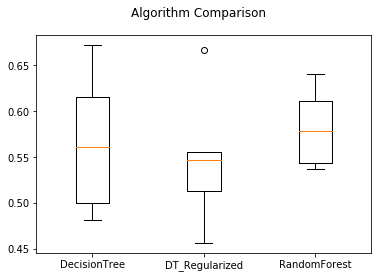

In [16]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=5,random_state=2)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, 
                                                 scoring='recall')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.var())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [17]:
results

[array([0.5       , 0.671875  , 0.56140351, 0.61538462, 0.48148148]),
 array([0.55555556, 0.546875  , 0.45614035, 0.51282051, 0.66666667]),
 array([0.61111111, 0.578125  , 0.54385965, 0.64102564, 0.53703704])]

# evaluation of each model with results:

#DecisionTree: 0.566029 (0.005034)
    Biased error = 1 - 0.56 = 44%
    Varience error = 0.0050 
    
#DT_Regularized: 0.547612 (0.004763)
    Biased error = 1 - 0.54 = 46%
    Varience error = 0.0047 
Conclusion: Here Varience error reduced w.r.t Decision tree from 0.0050 to 0.0047 with cost of Baised error 44% to 46%.
    
#RandomForest: 0.582232 (0.001565)
    Biased error = 1 - 0.58 = 42%
    Varience error = 0.0015 
Conclusion: Here Varience error reduced w.r.t Decision tree from 0.0047 to 0.0015 along with Baised error from 46% to 42%.